In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
    #nltk.download('vader_lexicon')
    #nltk.download('wordnet')
import demoji #Used to convert emojis to text
from wordcloud import WordCloud

In [19]:
df1 = pd.read_csv('data_11_30_20_df.csv', low_memory= False)
df2 = pd.read_csv('data_12-06-20_df.csv', low_memory= False)
df3 = pd.read_csv('data_12-13-20_df.csv', low_memory= False)

In [20]:
#Previous analysis focused on one data set. For this step, will be merging and reviewing all three data pulls.
dfs = [df1, df2, df3]
df = pd.concat(dfs)

In [21]:
df.head(5)

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,quoted_status.place.id,quoted_status.place.url,quoted_status.place.place_type,quoted_status.place.name,quoted_status.place.full_name,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates
0,Mon Nov 30 03:47:59 +0000 2020,1333256437225713664,1333256437225713664,"RT @GlacierArtist: https://t.co/WRdskuo5hr\n""E...",False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mon Nov 30 03:39:03 +0000 2020,1333254185278693378,1333254185278693378,RT @CowboyParamedic: HUGE ONE DAY SALE!!!! Nov...,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mon Nov 30 03:32:31 +0000 2020,1333252543758086145,1333252543758086145,Teddy Roosevelt was onto something when select...,True,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mon Nov 30 03:20:08 +0000 2020,1333249426807197702,1333249426807197702,RT @TrailofHighways: Bridge of timber in a for...,False,"<a href=""https://www.main-angler.de"" rel=""nofo...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mon Nov 30 03:20:03 +0000 2020,1333249404262821888,1333249404262821888,"Bridge of timber in a forest of timber, \n.\n....",True,"<a href=""https://www.hootsuite.com"" rel=""nofol...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_nort = df[~df.text.str.contains('RT')].drop_duplicates(subset='text') #Removes retweets and drops duplicate tweets

tweet = df_nort.text.str.lower() #Separates tweets from other twitter data and converts to lower case

In [23]:
#Before additional tweet cleaning, converting emojis to text using demoji. 
#This allows the meaning of emojis to be used in text analysis. 
demoji.download_codes()

tweet_noemoji = tweet.str.cat(sep=' ') #Convert series to list

demoji.findall(tweet_noemoji) #Finds emojis in tweets

tweet_noemoji = demoji.replace_with_desc(tweet_noemoji, sep= ' ') #Replaces emojis with text description

... OK (Got response in 0.09 seconds)
Writing emoji data to /Users/shelbyheise/.demoji/codes.json ...
... OK


In [25]:
#Additional tweet cleaning

tweet_nopunc = re.sub(r'([^\s\w]|_)+', '', tweet_noemoji) #Removes all characters that are non-alphanumeric 

tweet_nopunc = re.sub(r'http\S+', '', tweet_nopunc) #Removes hyperlinks

tweet_nopunc = re.sub(r'\bamp\b', '', tweet_nopunc) #'&amp' was showing up in previous versions, and should be removed

In [26]:
#print(tweet_nopunc)

In [27]:
#Create tokens
tknzr = TweetTokenizer(strip_handles=True)
tokens = tknzr.tokenize(tweet_nopunc)

In [28]:
#print(tokens)

In [29]:
#Remove stop words
stop_words = stopwords.words('english')
tweet_stop = list()
for t in tokens:
    if t not in stop_words:
        tweet_stop.append(t)
#print(tweet_stop)

In [30]:
#Lemmatize
lemmatizer = WordNetLemmatizer() 
tweet_final = list()
for f in tweet_stop:
    tweet_final.append(lemmatizer.lemmatize(f))
    
#print(tweet_final)

In [31]:
#Check for frequency of words
fd = nltk.FreqDist(tweet_final)

print(fd.most_common(100)) #100 most common words

[('yosemite', 522), ('np', 447), ('park', 367), ('national', 362), ('grandcanyon', 284), ('canyon', 202), ('grand', 201), ('mountain', 192), ('trail', 139), ('day', 118), ('great', 115), ('gsmnp', 101), ('california', 97), ('hike', 97), ('view', 94), ('2020', 89), ('today', 88), ('art', 88), ('one', 87), ('hiking', 85), ('face', 85), ('arizona', 79), ('travel', 78), ('image', 77), ('trip', 76), ('year', 75), ('lake', 75), ('glaciernationalpark', 75), ('winter', 71), ('camera', 71), ('fall', 70), ('rmnp', 68), ('photography', 68), ('glacier', 65), ('see', 62), ('nature', 61), ('tree', 60), ('beautiful', 59), ('customer', 57), ('photo', 57), ('eye', 57), ('nationalpark', 57), ('time', 56), ('15', 56), ('live', 55), ('death', 55), ('findyourpark', 53), ('best', 51), ('recently', 51), ('tuleelk', 51), ('zion', 50), ('zionnationalpark', 49), ('activist', 49), ('demonstrated', 49), ('mourned', 49), ('preventable', 49), ('colorado', 48), ('like', 48), ('malice', 48), ('sunset', 47), ('snow', 

In [32]:
print(fd.most_common()[-100:]) #100 least common words

[('roll', 1), ('earthfromabove', 1), ('Americas', 1), ('Greenland', 1), ('beehive', 1), ('utwoeightnine', 1), ('bay', 1), ('preserve', 1), ('glacierbaynps', 1), ('mesa', 1), ('verde', 1), ('decisi', 1), ('chamisa', 1), ('lucy', 1), ('yanagida', 1), ('digitaldesigndisplay', 1), ('itll', 1), ('califo', 1), ('surprise', 1), ('cloudsrest', 1), ('gunnison', 1), ('dinosaurnps', 1), ('f16', 1), ('aperture', 1), ('160', 1), ('exposure', 1), ('windy', 1), ('baum', 1), ('chasingbaseball', 1), ('baumbat', 1), ('flatgroundbats', 1), ('snap', 1), ('childrens', 1), ('evacuation', 1), ('collision', 1), ('maynards', 1), ('playing', 1), ('parcel', 1), ('boogie', 1), ('pleasure', 1), ('knife', 1), ('plate', 1), ('foodbank', 1), ('jumper', 1), ('acces', 1), ('hawkeye', 1), ('flightde', 1), ('setonhall', 1), ('gamblingtwitter', 1), ('ncaab', 1), ('liondog', 1), ('goprocharlie', 1), ('shihtzu', 1), ('gear', 1), ('youd', 1), ('bellhop', 1), ('bell', 1), ('role', 1), ('backend', 1), ('tomcat', 1), ('internat

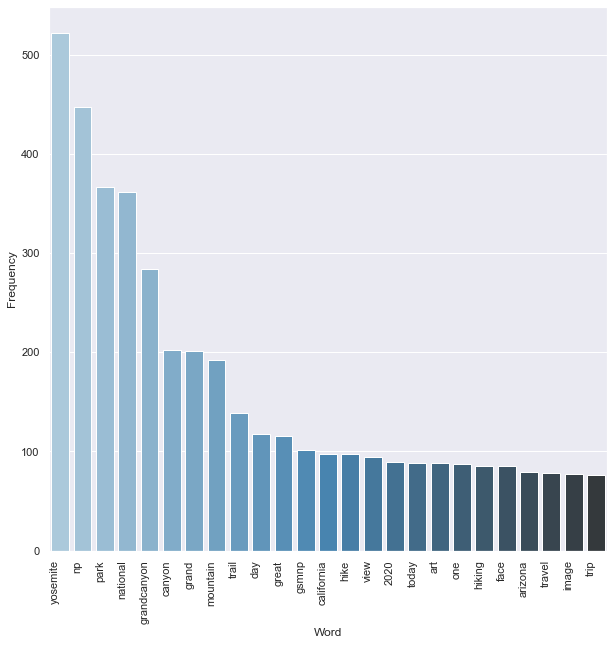

In [33]:
df_most_comm = pd.DataFrame(fd.most_common(25),
                    columns=['Word', 'Frequency'])

labels = df_most_comm.Word
plt.figure(figsize=(10,10))
sns.set_theme(style='darkgrid')
plot = sns.barplot(x='Word', y='Frequency', data=df_most_comm, palette='Blues_d')
plot.set_xticklabels(labels, rotation=90, ha='right')

plt.show()

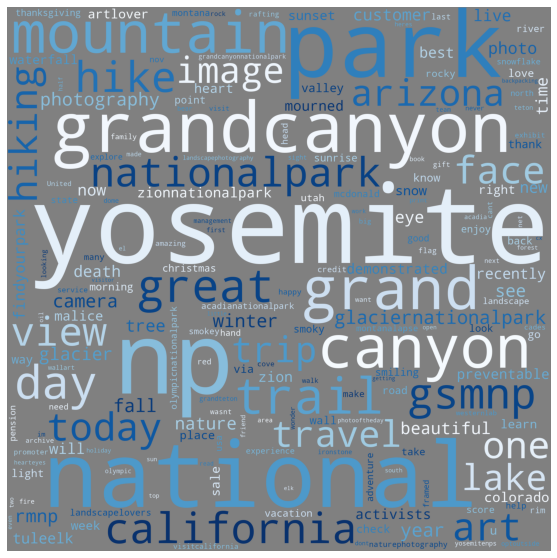

In [34]:
plt.figure(figsize=(10, 10))
plt.axis("off")
wordcloud = WordCloud(width = 2000, height = 2000, random_state=1, background_color='grey', colormap='Blues', collocations=False).generate(tweet_nopunc)
plt.imshow(wordcloud)

In [35]:
sid = SentimentIntensityAnalyzer()
ss = sid.polarity_scores(tweet_nopunc)
print('Sentiment Analysis:',ss)

Sentiment Analysis: {'neg': 0.032, 'neu': 0.764, 'pos': 0.204, 'compound': 1.0}
